In [36]:
import numpy as np
from scipy import stats
from scipy.stats import kurtosis
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# abrir o arquivo para leitura
arquivo = open('GAMES.txt', 'r')

# ler todas as linhas do arquivo, menos a primeira linha
linhas = arquivo.readlines()[1:]
# float
dados = [float(linha.strip().replace(',', '.')) for linha in linhas]

# Feche o arquivo manualmente
arquivo.close()

# Converta a lista de dados em um array NumPy
dados = np.array(dados)

Medidas de centralidade e de dispersão

Calcular média

In [37]:
media = np.mean(dados)
print('Média: ', media)

Média:  234.79507815631263


Calcular mediana

In [38]:
mediana = np.median(dados)
print('Mediana: ', mediana)

Mediana:  234.139


Calcular moda

In [39]:
unique_values, counts = np.unique(dados, return_counts=True)
max_count_index = np.argmax(counts)
moda = unique_values[max_count_index]
print('Moda: ', moda)

Moda:  35.845


Calcular desvio padrão

In [40]:
desvio_padrao = np.std(dados)
print('Desvio Padrão: ', desvio_padrao)

Desvio Padrão:  63.01915689492679


Calcular variância

In [41]:
variancia = np.var(dados)
print('Variância: ', variancia)

Variância:  3971.4141357473986


Calcular coeficiente de variação

In [42]:
coeficiente_variacao = (desvio_padrao / media) * 100
print('Coeficiente de variação: ', coeficiente_variacao)

Coeficiente de variação:  26.84006725770136


Calcular quartis

In [43]:
q1 = np.percentile(dados, 25)  # Primeiro quartil (Q1)
q2 = np.percentile(dados, 50)  # Segundo quartil (mediana, Q2)
q3 = np.percentile(dados, 75)  # Terceiro quartil (Q3)

print('Q1 (Primeiro Quartil):', q1)
print('Q2 (Mediana):', q2)
print('Q3 (Terceiro Quartil):', q3)

Q1 (Primeiro Quartil): 191.55700000000002
Q2 (Mediana): 234.139
Q3 (Terceiro Quartil): 277.7205


In [44]:
curtose = kurtosis(dados)
print('Curtose:', curtose)

Curtose: -0.06398596614758079


Histograma

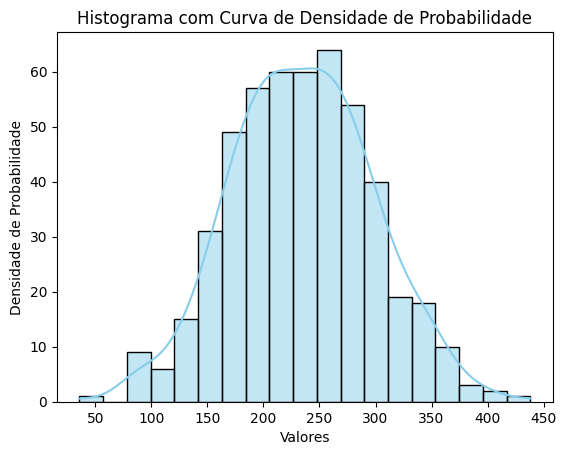

In [45]:
# Crie um histograma com a curva de densidade de probabilidade
sns.histplot(dados, kde=True, color='skyblue')
plt.title('Histograma com Curva de Densidade de Probabilidade')
plt.xlabel('Valores')
plt.ylabel('Densidade de Probabilidade')
plt.show()

Gráfico de linhas

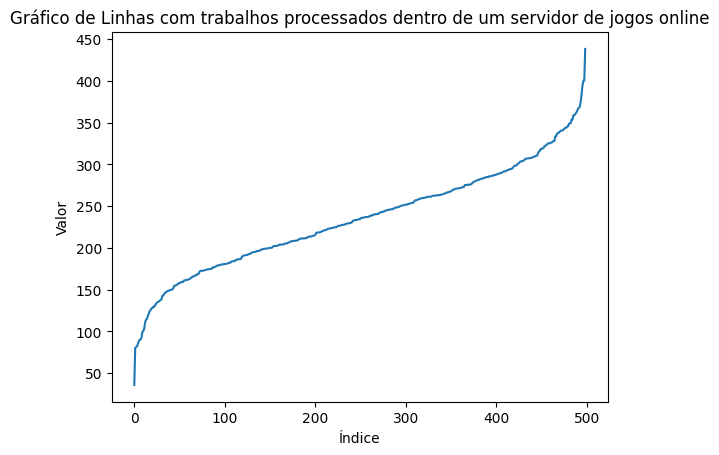

In [46]:
# ordenar os dados
dados_originais = np.sort(dados)

# Crie um gráfico de linhas
plt.plot(dados_originais)

# Personalize o gráfico (rótulos de eixo, título, etc.)
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Gráfico de Linhas com trabalhos processados dentro de um servidor de jogos online')

# Exiba o gráfico
plt.show()


BoxPlot

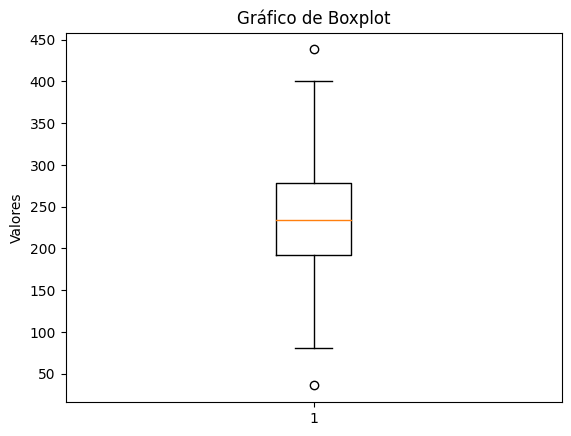

In [47]:
# Crie o gráfico de boxplot
plt.boxplot(dados)

# Personalize o gráfico (rótulos de eixo, título, etc.)
plt.ylabel('Valores')
plt.title('Gráfico de Boxplot')

# Exiba o gráfico
plt.show()

Teste de hipótese 1

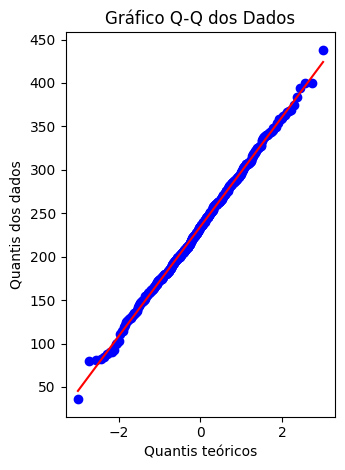

In [48]:
plt.subplot(1, 2, 2)
stats.probplot(dados, dist='norm', plot=plt)
plt.title('Gráfico Q-Q dos Dados')
plt.xlabel('Quantis teóricos')
plt.ylabel('Quantis dos dados')

plt.tight_layout()
plt.show()

In [49]:
alpha = 0.05
statistic, p_value = stats.mstats.normaltest(dados)

if p_value > alpha:
    print(f'A hipótese nula é confirmada,com intervalo de confiança de 95%, ou seja, os dados são normalmente distribuídos, pois o p-value dos dados é de {p_value:.4f} e é maior que o alpha ({alpha}).')
else:
    print(f'A hipótese nula é descartada,com intervalo de confiança de 95%, ou seja, os dados não são normalmente distribuídos,distribuídos, pois o p-value dos dados é de {p_value:.4f} e é menor que o alpha ({alpha}).')


Há evidências suficientes, ao nível de significância de 5%, para confirmar que os dados são normalmente distribuídos, pois o p-value dos dados é de 0.9313 e é maior que o alpha (0.05).


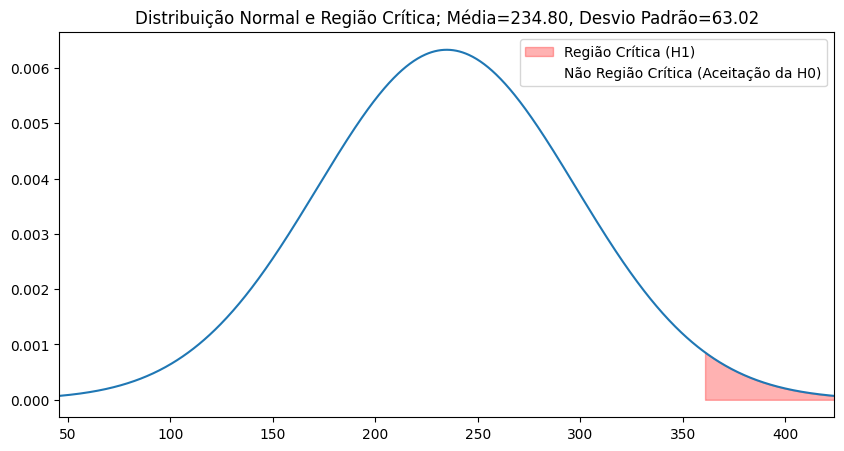

In [50]:
# Suponha que você tenha uma média (mu) e um desvio padrão (sigma) para suas amostras
mu = media
sigma = desvio_padrao

# Cria um conjunto de valores x ao longo de um intervalo
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)

# Calcula a função de densidade de probabilidade (PDF) da distribuição normal
y = stats.norm.pdf(x, mu, sigma)

# Cria o gráfico da distribuição normal
plt.figure(figsize=(10, 5))
plt.plot(x, y)

# Define os limites do gráfico
plt.xlim(mu - 3*sigma, mu + 3*sigma)

# Define as regiões críticas para a hipótese
x1 = np.linspace(mu + 2*sigma, mu + 3*sigma, 1000)
x2 = np.linspace(mu - 3*sigma, mu - 2*sigma, 1000)

# Calcula as PDFs para as regiões críticas
y1 = stats.norm.pdf(x1, mu, sigma)
y2 = stats.norm.pdf(x2, mu, sigma)

# Preenche a região crítica relacionada à hipótese alternativa (H1)
plt.fill_between(x1, y1, color='red', alpha=.3, label='Região Crítica (H1)')

# Preenche a região fora da região crítica (rejeição da H0)
plt.fill_between(x2, y2, color='white', alpha=1, label='Não Região Crítica (Aceitação da H0)')

# Adiciona um título e legenda
plt.title('Distribuição Normal e Região Crítica; Média={:.2f}, Desvio Padrão={:.2f}'.format(mu, sigma))
plt.legend()

# Exibe o gráfico
plt.show()

Teste de hipótese 2

In [51]:
# Dividindo os dados em finais de semana e dias úteis
def numpy_index(arr, valor):
    indice = np.where(arr == valor)[0][0]
    return int(indice)

finais_de_semana = [i for i in dados if numpy_index(dados, i) % 7 == 5 or numpy_index(dados, i) % 7 == 6]
dias_uteis = [i for i in dados if numpy_index(dados, i) % 7 < 5 and numpy_index(dados, i) % 7 >= 0]

# Nível de significância
alpha = 0.05

# Teste t independente
t_statistic, p_value = stats.ttest_ind(finais_de_semana, dias_uteis)


# Comparação com o nível de significância
if p_value < alpha:
    print("Rejeitamos a hipótese nula.")
    print("A média do tamanho médio de trabalhos nos finais de semana é significativamente maior do que nos dias úteis.")
else:
    print("Não temos evidências para rejeitar a hipótese nula.")
    print("A média do tamanho médio de trabalhos nos finais de semana não é significativamente maior do que nos dias úteis.")

# Exibindo estatísticas do teste
print("Estatística t:", t_statistic)
print("Valor p:", p_value)


Não temos evidências para rejeitar a hipótese nula.
A média do tamanho médio de trabalhos nos finais de semana não é significativamente maior do que nos dias úteis.
Estatística t: -0.10617104257546178
Valor p: 0.9154894847827266
